# **19SW01 DSA Semester Project**

## Diabetes Prediction Using Machine Learning
**INTRODUCTION** In this project, I have used the PIMA Indians Diabetes Dataset for the Diabetes Prediction. All the patients in the dataset are females at least 21 years. The dataset consists of 768 rows and 9 columns. Out of which 8 columns are predictors and the last column that is 'Outcome' is the target column. The names and description of all columns are as under:


*   Pregnancies - To show the number of pregnancies
*   Glucose - To express the glucose level of blood
*   BloodPressure - To express the blood pressure measurement
*   SkinThickness - To express the thickness of skin
*   Insulin - To express the insulin level of blood
*   BMI - To express the Body Mass Index
*   DiabetesPedigreeFunction - To express the diabetes percentage
*   Age - To express the age
*   Outcome - To express the final result (1 is Yes and 0 is No)










# **Procedural Steps**

1.   Importing Python Libraries
2.   Importing Data from CSV file
3.   Exploring Data
4.   Data cleaning (Handling outliers and duplicate values)
5.   Data visualization
6.   Converting Data to a Standard Form
7.   Splitting Dataset into Training & Testing Data
8.   Model Building using Training Dataset
9.   Model Testing using Testing Dataset
10.  Building a Confusion Matrix
11.  Making a Predictive System













# **Step 1 Importing Python Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

## **Step 2 Importing Dataset from CSV File**

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv');

## **Step 3 Exploring Dataset**

In [ ]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
data.tail(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
data.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
50,1,103,80,11,82,19.4,0.491,22,0
75,1,0,48,20,0,24.7,0.140,22,0
718,1,108,60,46,178,35.5,0.415,24,0
107,4,144,58,28,140,29.5,0.287,37,0
88,15,136,70,32,110,37.1,0.153,43,1
553,1,88,62,24,44,29.9,0.422,23,0
574,1,143,86,30,330,30.1,0.892,23,0
210,2,81,60,22,0,27.7,0.290,25,0
707,2,127,46,21,335,34.4,0.176,22,0
658,11,127,106,0,0,39.0,0.190,51,0


In [ ]:
data.shape

(768, 9)

In [ ]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
print("The number of non-diabetic persons: ",data[data['Outcome'] == 0].shape[0]);
print("The number of diabetic persons: ",data[data['Outcome'] == 1].shape[0]);

The number of non-diabetic persons:  500
The number of diabetic persons:  268


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## **Step 4 Data Cleaning (Handling Outliers & Duplicate Values)**

In [ ]:
# Droping Duplicate Values
data.shape

(768, 9)

In [ ]:
data.drop_duplicates

<bound method DataFrame.drop_duplicates of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                     

In [ ]:
data.shape

(768, 9)

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# As we can observe that the minimum values of the Glucose, BloodPressure and BMI are zero that do not exists.
# They are outliers and we have to replace them by their corresponding means.
print("Number of Zero values in Glucose : ",data[data['Glucose']==0].shape[0])
print("Number of Zero values in BloodPressure : ",data[data['BloodPressure']==0].shape[0])
print("Number of Zero values in BMI : ",data[data['BMI']==0].shape[0])

Number of Zero values in Glucose :  5
Number of Zero values in BloodPressure :  35
Number of Zero values in BMI :  11


In [ ]:
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,20.536458,79.799479,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,15.952218,115.244002,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,0.000000,0.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## **Step 5 Data Visualization**

In [ ]:
sns.set_style('darkgrid');
matplotlib.rcParams['figure.figsize'] = (12,8);
matplotlib.rcParams['font.size'] = 14;

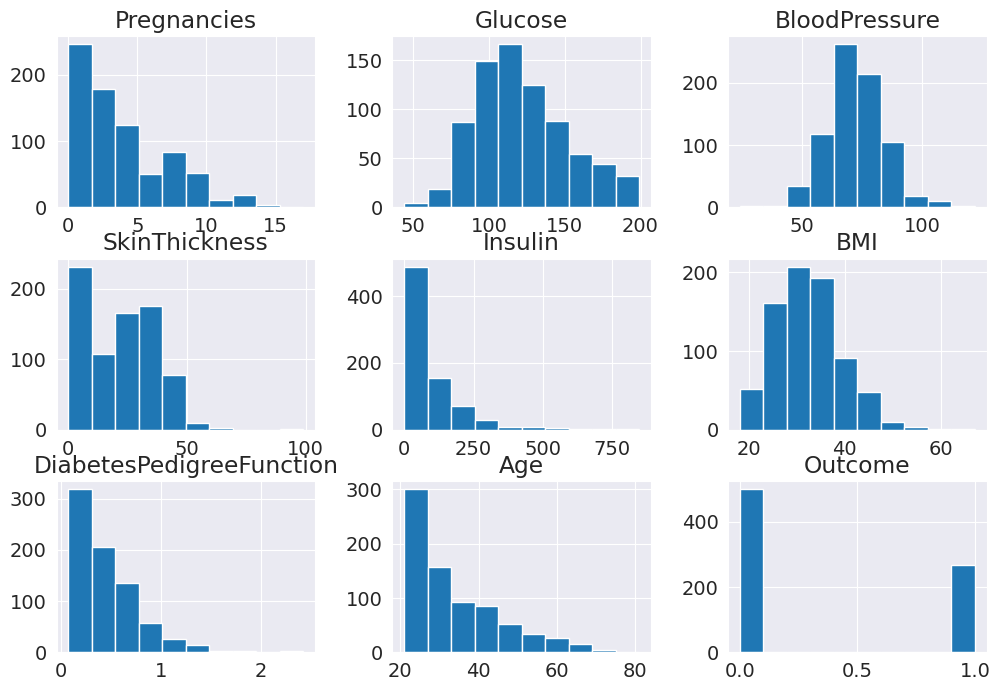

In [ ]:
data.hist();

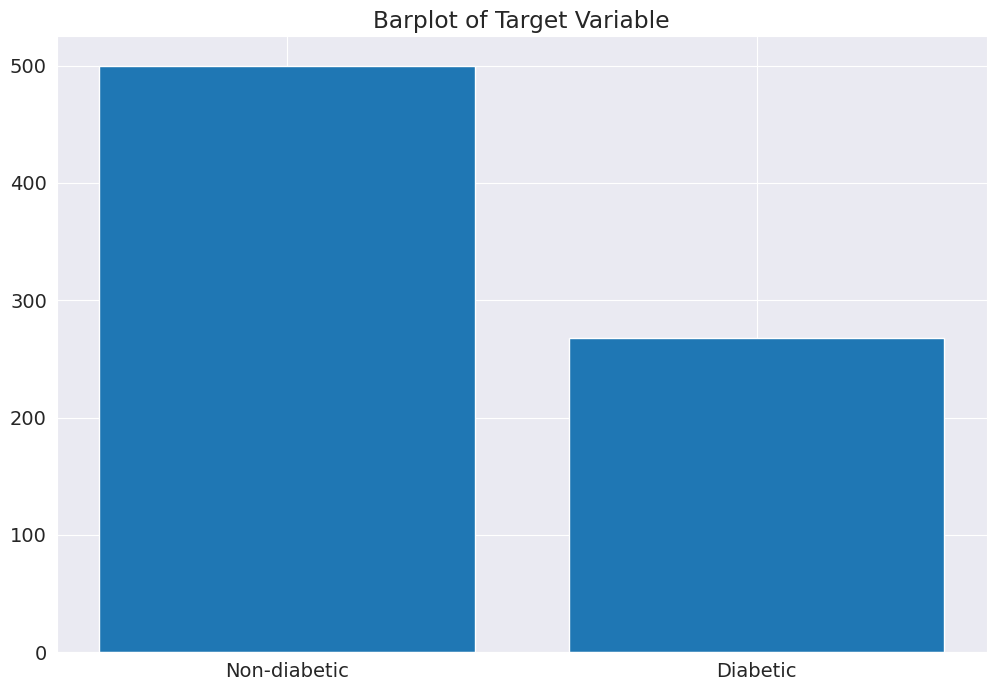

<Figure size 600x600 with 0 Axes>

In [ ]:
no_of_0s = data[data['Outcome']==0].shape[0]
no_of_1s = data[data['Outcome']==1].shape[0]
plt.bar(['Non-diabetic','Diabetic'],[no_of_0s,no_of_1s]);
plt.title("Barplot of Target Variable");
plt.figure(figsize=(6,6));

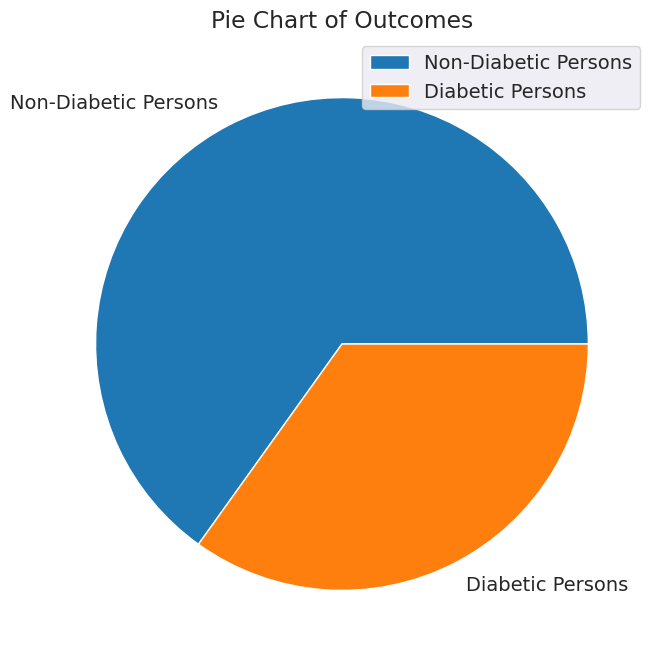

In [ ]:
plt.pie([no_of_0s,no_of_1s],labels=['Non-Diabetic Persons','Diabetic Persons']);
plt.legend();
plt.title('Pie Chart of Outcomes');

## **Step 6 Converting Data to a Standard Form**

In [ ]:
X = data.drop(columns = 'Outcome',axis=1);
print(X);

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0             35        0  33.6   
1              1     85.0           66.0             29        0  26.6   
2              8    183.0           64.0              0        0  23.3   
3              1     89.0           66.0             23       94  28.1   
4              0    137.0           40.0             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0             48      180  32.9   
764            2    122.0           70.0             27        0  36.8   
765            5    121.0           72.0             23      112  26.2   
766            1    126.0           60.0              0        0  30.1   
767            1     93.0           70.0             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X)

StandardScaler()

In [ ]:
standardized_data = scaler.transform(X)

In [ ]:
print(standardized_data)

[[ 0.63994726  0.86527574 -0.0210444  ...  0.16725546  0.46849198
   1.4259954 ]
 [-0.84488505 -1.20598931 -0.51658286 ... -0.85153454 -0.36506078
  -0.19067191]
 [ 1.23388019  2.01597855 -0.68176235 ... -1.33182125  0.60439732
  -0.10558415]
 ...
 [ 0.3429808  -0.02240928 -0.0210444  ... -0.90975111 -0.68519336
  -0.27575966]
 [-0.84488505  0.14197684 -1.01212132 ... -0.34213954 -0.37110101
   1.17073215]
 [-0.84488505 -0.94297153 -0.18622389 ... -0.29847711 -0.47378505
  -0.87137393]]


In [ ]:
X = standardized_data
Y = data['Outcome']

# **Step 7 Splitting Dataset into Training & Testing Data**

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.15, stratify = Y, random_state = 2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)
print(Y.shape,Y_train.shape,Y_test.shape)

(768, 8) (652, 8) (116, 8)
(768,) (652,) (116,)


# **Step 8 Model Building using Training Dataset**

In [ ]:
SVMclassifier = svm.SVC(kernel='linear')

In [ ]:
SVMclassifier.fit(X_train,Y_train)

SVC(kernel='linear')

## **Step 9 Model Testing using Testing Dataset**

In [ ]:
X_test_prediction = SVMclassifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [ ]:
print("Accuracy Score of Training data : ",test_data_accuracy)

Accuracy Score of Training data :  0.7758620689655172


## **Step 10 Building a Confusion Matrix**

In [ ]:
cm = confusion_matrix(Y_test,X_test_prediction)

In [ ]:
print(cm)

[[70  6]
 [20 20]]


In [ ]:
TP = cm[0][0]
TN = cm[1][1]
FP = cm[0][1]
FN = cm[1][0]

In [ ]:
print("Total True Positives are ",TP);
print("Total True Negatives are ",TN);
print("Total False Positives are ",FP);
print("Total False Negatives are ",FN);

Total True Positives are  70
Total True Negatives are  20
Total False Positives are  6
Total False Negatives are  20


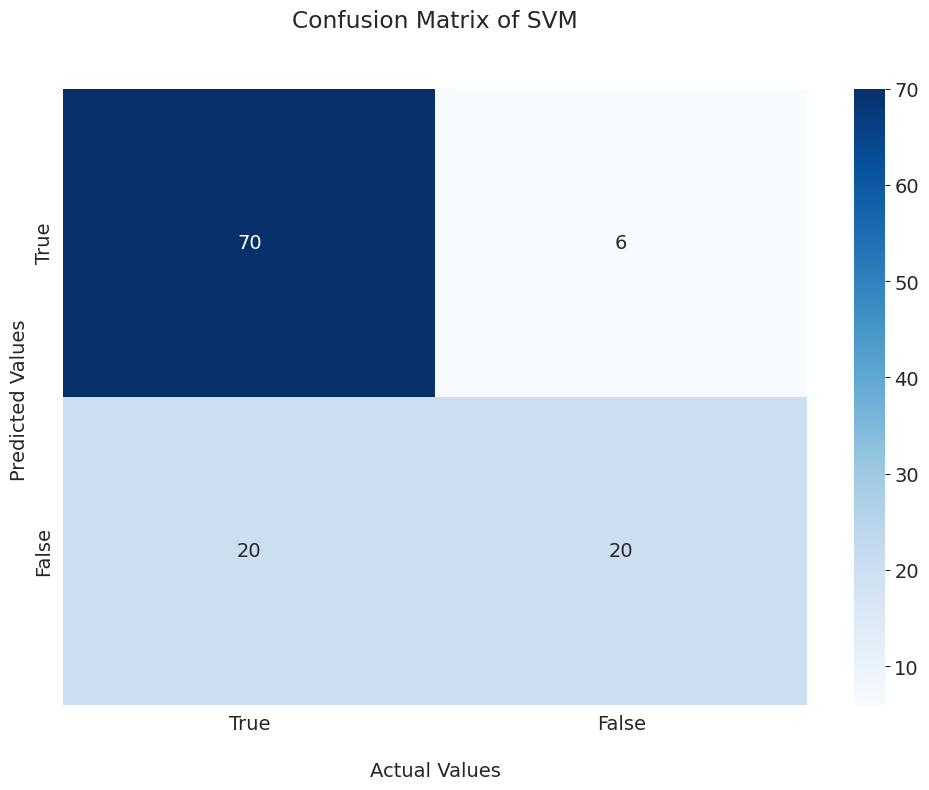

<Figure size 600x300 with 0 Axes>

In [ ]:
heatMap_cm = sns.heatmap(cm, annot=True, cmap='Blues')

heatMap_cm.set_title('Confusion Matrix of SVM\n\n');
heatMap_cm.set_xlabel('\nActual Values')
heatMap_cm.set_ylabel('Predicted Values ');

heatMap_cm.xaxis.set_ticklabels(['True','False']);
heatMap_cm.yaxis.set_ticklabels(['True','False']);

plt.figure(figsize=(6,3));
plt.show();


## **Step 11 Making a Predictive System**

In [ ]:
# (4,110,92,0,0,37.6,0.191,30) => Non-diabetic Person Data
# (5,166,72,19,175,28.5,0.587,51) => Diabetic Person Data
preg = int(input('Number of Pregnancies : '));
glucose = int(input('Glucose : '));
bp = int(input('Blood Pressure : '));
sk = int(input('Skin Thickness : '));
ins = int(input('Insulin : '));
bmi = float(input('Body Mass Index : '));
dfunction = float(input('Diabetes Pedigree Function : '));
age = int(input('Age : '));

input_data = (preg,glucose,bp,sk,ins,bmi,dfunction,age)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

std_data = scaler.transform(input_data_reshaped)

prediction = SVMclassifier.predict(std_data)

if(prediction[0]==0):
  print("The person is not diabetic.")
else:
  print("The person is diabetic.")


Number of Pregnancies : 2
Glucose : 106
Blood Pressure : 34
Skin Thickness : 20
Insulin : 20
Body Mass Index : 25
Diabetes Pedigree Function : 456
Age : 40
The person is diabetic.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## **Saving SVM Model**

In [ ]:
import pickle

In [ ]:
filename = 'trained_model.sav'
pickle.dump(SVMclassifier,open(filename,'wb'))

## **Loading SVM Model**

In [ ]:
loaded_model = pickle.load(open('trained_model.sav','rb'))

In [ ]:
# (4,110,92,0,0,37.6,0.191,30) => Non-diabetic Person Data
# (5,166,72,19,175,28.5,0.587,51) => Diabetic Person Data
# preg = int(input('Number of Pregnancies : '));
# glucose = int(input('Glucose : '));
# bp = int(input('Blood Pressure : '));
# sk = int(input('Skin Thickness : '));
# ins = int(input('Insulin : '));
# bmi = float(input('Body Mass Index : '));
# dfunction = float(input('Diabetes Pedigree Function : '));
# age = int(input('Age : '));

input_data = (5,166,72,19,175,28.5,0.587,51)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)

if(prediction[0]==0):
  print("The person is not diabetic.")
else:
  print("The person is diabetic.")


The person is diabetic.


## **Implemention Using Linear Regression and Decision Trees**

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [ ]:
lm.fit(X_train,Y_train)

LinearRegression()

In [ ]:
X_test_prediction_lr = lm.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)
print(test_data_accuracy)

0.7758620689655172


In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, Y_train)

GaussianNB()

In [ ]:
from sklearn import metrics

In [ ]:
y_pred = model.predict(X_test)
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(Y_test, y_pred)*100)
nb_accuracy = metrics.accuracy_score(Y_test, y_pred);
print(nb_accuracy)

Gaussian Naive Bayes model accuracy(in %): 74.13793103448276
0.7413793103448276


In [ ]:
cm = confusion_matrix(Y_test,y_pred)
print(cm)

[[66 10]
 [20 20]]


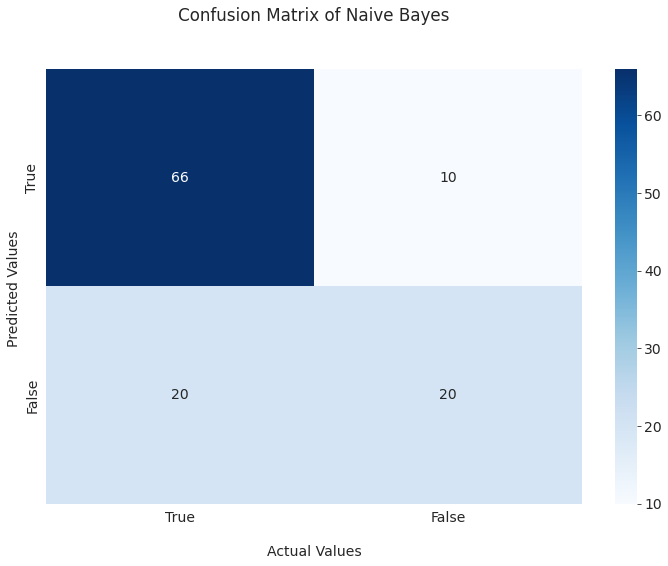

<Figure size 432x216 with 0 Axes>

In [ ]:
heatMap_cm = sns.heatmap(cm, annot=True, cmap='Blues');

heatMap_cm.set_title('Confusion Matrix of Naive Bayes\n\n');
heatMap_cm.set_xlabel('\nActual Values');
heatMap_cm.set_ylabel('Predicted Values ');

heatMap_cm.xaxis.set_ticklabels(['True','False']);
heatMap_cm.yaxis.set_ticklabels(['True','False']);

plt.figure(figsize=(6,3));
plt.show();

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth=4)

drugTree.fit(X_train, Y_train)
predicted = drugTree.predict(X_test)

print(predicted)

print("DecisionTrees's Accuracy: ", metrics.accuracy_score(Y_test, predicted));
dt_accuracy = metrics.accuracy_score(Y_test, predicted);
print(dt_accuracy);

[1 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 1 1 1 0 1]
DecisionTrees's Accuracy:  0.7413793103448276
0.7413793103448276


In [ ]:
cm = confusion_matrix(Y_test,predicted)
print(cm)

[[69  7]
 [23 17]]


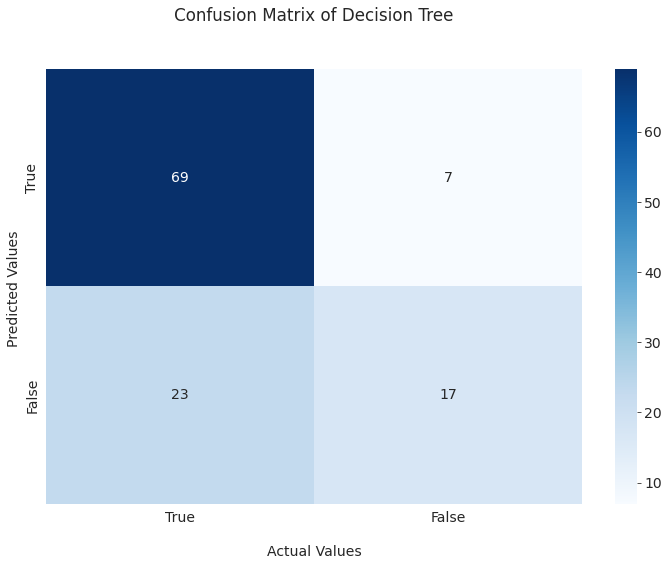

<Figure size 432x216 with 0 Axes>

In [ ]:
heatMap_cm = sns.heatmap(cm, annot=True, cmap='Blues');

heatMap_cm.set_title('Confusion Matrix of Decision Tree\n\n');
heatMap_cm.set_xlabel('\nActual Values');
heatMap_cm.set_ylabel('Predicted Values ');

heatMap_cm.xaxis.set_ticklabels(['True','False']);
heatMap_cm.yaxis.set_ticklabels(['True','False']);

plt.figure(figsize=(6,3));
plt.show();

In [ ]:
acc1 = test_data_accuracy
print(acc1)

0.7758620689655172


In [ ]:
acc2 = nb_accuracy
print(acc2)

0.7413793103448276


In [ ]:
acc3 = dt_accuracy
print(dt_accuracy)

0.7413793103448276


In [ ]:
sns.set_style('darkgrid');
matplotlib.rcParams['figure.figsize'] = (6,6);
matplotlib.rcParams['font.size'] = 14;

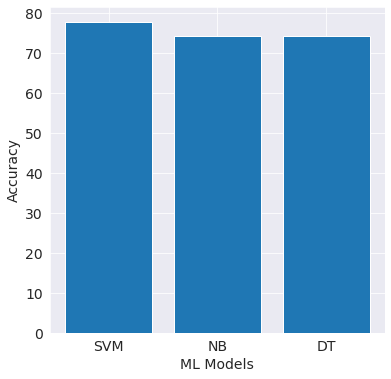

In [ ]:
plt.bar(['SVM','NB','DT'],[acc1*100,acc2*100,acc3*100]);
plt.xlabel('ML Models');
plt.ylabel('Accuracy');